## PART 1: Design a multi-label NLP classifier for blog authorship corpus which will classify blogs based on authors' multiple features.

#### We will import  the corpus, analyse it and split it into text and labels. We will vectorize and compare the text using Bag of Words and TF-IDF vectorization technqiues. We will merge and transform the target classes into binaries. Then we will design , train and tune ML and ANN models and pick which performs best.





In [1]:
#Import libraries
import nltk
from nltk import word_tokenize
import pandas as pd
from nltk.corpus import stopwords
import re
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
import tensorflow
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
import numpy as np
from sklearn.svm import SVC
from tensorflow.keras import Model,Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Input,Embedding,Flatten,BatchNormalization
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from tensorflow.keras.initializers import GlorotNormal,GlorotUniform,HeNormal,HeUniform
from sklearn.preprocessing import MultiLabelBinarizer,Normalizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
path ='/content/drive/MyDrive/Great Learning/NLP'

### 1. Import and analyse dataset

In [4]:
blog_csv = pd.read_csv(path + '/blogtext.csv')

In [5]:
#Check for dataset shape, column names and datatypes of columns
print("Shape of blog dataframe : ", blog_csv.shape)
print("Columns of blog dataframe : ", blog_csv.columns)
print("Info of blog dataframe : ", blog_csv.info())


Shape of blog dataframe :  (681284, 7)
Columns of blog dataframe :  Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB
Info of blog dataframe :  None


In [6]:
#Check for null values
blog_csv.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [7]:
blog_csv.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [8]:
#5 point summary
blog_csv.describe()

,id,age
count,6.812840e+05,681284.000000
mean,2.397802e+06,23.932326
std,1.247723e+06,7.786009
min,5.114000e+03,13.000000
25%,1.239610e+06,17.000000
50%,2.607577e+06,24.000000
75%,3.525660e+06,26.000000
max,4.337650e+06,48.000000


In [9]:
#Check unique column values
unique_columns= ['topic','gender','sign']
for col in unique_columns:
  print("Unqiue values of column {} are {}".format(col,blog_csv[col].unique()))

Unqiue values of column topic are ['Student' 'InvestmentBanking' 'indUnk' 'Non-Profit' 'Banking' 'Education'
 'Engineering' 'Science' 'Communications-Media' 'BusinessServices'
 'Sports-Recreation' 'Arts' 'Internet' 'Museums-Libraries' 'Accounting'
 'Technology' 'Law' 'Consulting' 'Automotive' 'Religion' 'Fashion'
 'Publishing' 'Marketing' 'LawEnforcement-Security' 'HumanResources'
 'Telecommunications' 'Military' 'Government' 'Transportation'
 'Architecture' 'Advertising' 'Agriculture' 'Biotech' 'RealEstate'
 'Manufacturing' 'Construction' 'Chemicals' 'Maritime' 'Tourism'
 'Environment']
Unqiue values of column gender are ['male' 'female']
Unqiue values of column sign are ['Leo' 'Aquarius' 'Aries' 'Capricorn' 'Gemini' 'Cancer' 'Sagittarius'
 'Scorpio' 'Libra' 'Virgo' 'Taurus' 'Pisces']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


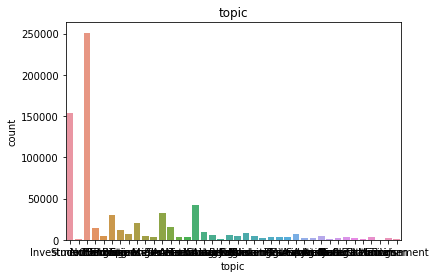

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


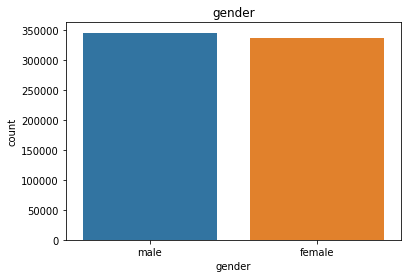

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


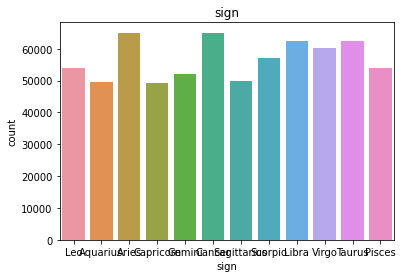

In [10]:
#Count the column values
for  col in unique_columns:
  sns.countplot(blog_csv[col])
  plt.title(col)
  plt.show()



In [11]:
for col in unique_columns:
  print("Count for column {}  is \n {} ".format(col,blog_csv[col].value_counts()))

Count for column topic  is 
 indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation     

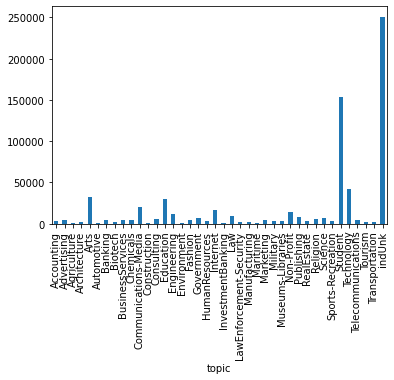

In [12]:
blog_csv.groupby('topic').text.count().plot.bar(ylim=0)

In [13]:
#Drop duplicates
blog_csv.drop_duplicates(inplace=True)

In [14]:
#Shape after dropping duplicates
blog_csv.shape

(676598, 7)

In [15]:
blog_csv.iloc[:50000,:]

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
50286,3565077,female,16,Student,Cancer,"03,August,2004",will be good! i've got a really great f...
50287,3565077,female,16,Student,Cancer,"01,August,2004","just watched it again with my mother, a..."
50288,4263493,female,23,indUnk,Aquarius,"21,August,2004",Then its time for vacation! w...
50289,4263493,female,23,indUnk,Aquarius,"18,August,2004",I feel like complete and tota...


In [16]:
# We will work on first 50k records owing to RAM restrictions.
blog_test_subrows=blog_csv.iloc[:50000]

In [17]:
blog_test_subrows.drop(['id','date'],  axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
blog_test_subrows.columns

Index(['gender', 'age', 'topic', 'sign', 'text'], dtype='object')

In [ ]:
blog_test_subrows.shape

(50000, 5)

### 2. Perform pre-processing on data

#### 2.1 Remove punctuation marks,special characters, brackets,numbers and characters that are not in English alphabet.

In [ ]:
wnLemm = WordNetLemmatizer()
def cleanData(cleanTxt):
  cleanTxt=re.sub('[0-9]'," ",cleanTxt)
  cleanTxt=re.sub('[\'\"\.\,(){}]'," ",cleanTxt)
  cleanTxt=re.sub('[!@\*?:;#\$\%^&~]'," ",cleanTxt)
  cleanTxt=re.sub('[+-\/X*]'," ",cleanTxt)
  cleanTxt=re.sub('[\[\]=<>]'," ",cleanTxt)
  cleanTxt=re.sub('[<<>>_*]'," ",cleanTxt)
  cleanTxt=re.sub('[^a-zA-Z]'," ",cleanTxt)
  cleanTxt=cleanTxt.lower()
  words_token = cleanTxt.split()
  words = [wnLemm.lemmatize(word) for word in words_token  if not word  in set(stopwords.words('english'))] 
  words = " ".join(words)
  return words

In [ ]:
blog_test_subrows['text']=blog_test_subrows['text'].apply(cleanData)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
blog_test_subrows[:1000]

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found page mb pdf file wait untill team l...
1,male,15,Student,Leo,team member drewes van der laag urllink mail r...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoo toolbar capture url popups mean s...
...,...,...,...,...,...
995,female,25,indUnk,Taurus,urllink doggy bed need say urllink
996,female,25,indUnk,Taurus,ah yes summer olympics halfway settled familia...
997,female,15,Arts,Pisces,current music could magic donna summer feeling...
998,female,15,Arts,Pisces,hey one many thing expression zone hope update...


##### Save the cleaned data to csv so that it can be read and used everytime

In [ ]:
blog_test_subrows.to_csv(path+'/BlogCsvCleaned_all.csv')

In [19]:
blog_test_subrows_new= pd.read_csv(path+'/BlogCsvCleaned_all.csv')

In [20]:
blog_test_subrows_new

,Unnamed: 0,gender,age,topic,sign,text
0,0,male,15,Student,Leo,info found page mb pdf file wait untill team l...
1,1,male,15,Student,Leo,team member drewes van der laag urllink mail r...
2,2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,3,male,15,Student,Leo,testing testing
4,4,male,33,InvestmentBanking,Aquarius,thanks yahoo toolbar capture url popups mean s...
...,...,...,...,...,...,...
49995,50286,female,16,Student,Cancer,good got really great feeling achieve although...
49996,50287,female,16,Student,Cancer,watched mother confirmed love however mum thin...
49997,50288,female,23,indUnk,Aquarius,time vacation wooo wait day away wonderful wor...
49998,50289,female,23,indUnk,Aquarius,feel like complete total crap right woke thing...


#### 2.2 Merge / Transform (Binarize)  target columns

In [21]:
# We will consider these authors' properties: age, gender, zodiac sign, topic
blog_test_subrows_new["age"] = blog_test_subrows_new["age"].astype(str)
blog_test_subrows_new["labels"] = blog_test_subrows_new.apply(lambda col :
                            [col["gender"],col["age"],col["topic"],col["sign"]],axis =1)


In [22]:
blog_test_subrows_new.dropna(axis=0,inplace=True)

In [23]:
blog_test_subrows_new.drop('Unnamed: 0',axis=1, inplace=True)

In [24]:
#Split features and category 
features = blog_test_subrows_new['text']
category= blog_test_subrows_new['labels']

In [25]:
#Count the number of entries for each class in all four categories
label_counts=dict()

for labels in category.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [26]:
print("Keys and their counts: \n",label_counts)

Keys and their counts: 
 {'male': 25535, '15': 3498, 'Student': 10716, 'Leo': 3834, '33': 1641, 'InvestmentBanking': 85, 'Aquarius': 4759, 'female': 24201, '14': 2059, 'indUnk': 17472, 'Aries': 7751, '25': 2822, 'Capricorn': 3801, '17': 6792, 'Gemini': 2583, '23': 5454, 'Non-Profit': 490, 'Cancer': 4494, 'Banking': 273, '37': 306, 'Sagittarius': 4562, '26': 2817, '24': 5748, 'Scorpio': 3194, '27': 4069, 'Education': 2635, '45': 93, 'Engineering': 1396, 'Libra': 4423, 'Science': 688, '34': 1882, '41': 392, 'Communications-Media': 1576, 'BusinessServices': 408, 'Sports-Recreation': 118, 'Virgo': 2808, 'Taurus': 3413, 'Arts': 1838, 'Pisces': 4114, '44': 41, '16': 4166, 'Internet': 1407, 'Museums-Libraries': 285, 'Accounting': 244, '39': 407, '35': 3353, 'Technology': 4336, '36': 1978, 'Law': 307, '46': 328, 'Consulting': 215, 'Automotive': 116, '42': 96, 'Religion': 256, '13': 757, 'Fashion': 1798, '38': 195, '43': 150, 'Publishing': 207, '40': 192, 'Marketing': 408, 'LawEnforcement-Secur

In [27]:
# Transform the target column into binary format using MultiLabelBinarizer.
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))
category = binarizer.fit_transform(category)
#Classes in the merged target column
binarizer.classes_

array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', 'Accounting', 'Advertising', 'Agriculture',
       'Aquarius', 'Architecture', 'Aries', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Cancer', 'Capricorn',
       'Chemicals', 'Communications-Media', 'Construction', 'Consulting',
       'Education', 'Engineering', 'Environment', 'Fashion', 'Gemini',
       'Government', 'HumanResources', 'Internet', 'InvestmentBanking',
       'Law', 'LawEnforcement-Security', 'Leo', 'Libra', 'Manufacturing',
       'Maritime', 'Marketing', 'Military', 'Museums-Libraries',
       'Non-Profit', 'Pisces', 'Publishing', 'RealEstate', 'Religion',
       'Sagittarius', 'Science', 'Scorpio', 'Sports-Recreation',
       'Student', 'Taurus', 'Technology', 'Telecommunications', 'Tourism',
       'Transportation', 'Virgo', 'female', 'indUnk', 'male'],
      dtype

In [28]:
category.shape

(49736, 80)

### 2.3 Vectorize features i.e text column using Bag of words and TF-IDF

In [29]:
bow=CountVectorizer(ngram_range=(1, 3), max_features=10000)
features_bow= bow.fit_transform(features)

In [30]:
tdIdf = TfidfVectorizer(ngram_range=(1,2), max_features=20000, stop_words='english',analyzer='word',norm='l2',max_df=0.75)
features_idf=tdIdf.fit_transform(features)

In [31]:
features_idf.shape

(49736, 20000)

##### Feature selection

In [32]:
from sklearn.feature_selection import SelectKBest,chi2

fs=  SelectKBest(chi2, k=2000)
features_idf_new =fs.fit_transform(features_idf,category)
features_bow_new=fs.fit_transform(features_bow,category)

In [33]:
fs.get_support()

array([ True, False, False, ..., False, False,  True])

In [34]:
features_idf_new.shape

(49736, 2000)

#### 2.4 Train and test split into 70:30 ratio

In [35]:
X_train_bow,X_test_bow,y_train_bow,y_test_bow= train_test_split(features_bow,category,test_size=0.30,random_state=42)

In [36]:
X_train,X_test,y_train,y_test= train_test_split(features_idf_new,category,test_size=0.30,random_state=42)

In [37]:
norm=Normalizer()
X_train_scale= norm.fit_transform(X_train)
X_test_scale=norm.transform(X_test)
X_train_bow_scale= norm.fit_transform(X_train_bow)
X_test_bow_scale=norm.transform(X_test_bow)

In [38]:
#Chechking the shapes of split sets
print('X train shape :',X_train.shape)
print('X test shape :',X_test.shape)
print('Y train shape :',y_train.shape)
print('Y test shape :',y_test.shape)
#print('X valid shape :',X_valid.shape)


X train shape : (34815, 2000)
X test shape : (14921, 2000)
Y train shape : (34815, 80)
Y test shape : (14921, 80)


### 3. Design, train, tune and test the best text classifier.




#### 3.1 Train models without hyperparameter tuning

In [39]:
logRegression=LogisticRegression(C=1.0,penalty='l1',solver='liblinear',max_iter =100,multi_class='ovr')
multiNomialNB =MultinomialNB()
gaussianNB=GaussianNB()
svm=SVC(C=1.0,kernel='rbf')
decisionCl=DecisionTreeClassifier(criterion='entropy',max_depth=20,max_leaf_nodes=10)
randomForest = RandomForestClassifier(n_estimators=15,criterion='entropy',max_depth=20)
models={"logisticRegression ":logRegression,
        "multiNomialNB":multiNomialNB,
        #"gaussianNB":gaussianNB,
        "decisionTree":decisionCl,"randomForest":randomForest}

In [ ]:
#Train using Bow

In [46]:
knn=KNeighborsClassifier(n_neighbors=10,algorithm='auto',weights="uniform")
knn.fit(X_train_bow_scale,y_train_bow)
pred_i = knn.predict(X_test_bow_scale)
print("=====KNN prediction using Bag of Words vectorization====")
print("Accuracy : ",accuracy_score(y_test_bow,pred_i))
print("F1_score : \n",f1_score(y_test_bow,pred_i,average='macro'))
print("F1_score : \n",f1_score(y_test_bow,pred_i,average='micro'))

=====KNN prediction using Bag of Words vectorization====
Accuracy :  0.028885463440788153
F1_score : 
 0.05275387693510043
F1_score : 
 0.22756897395605244


In [ ]:
#OneVsRestClassifier is used in case of multi label classification. This will try to fit one class versus all other classes in the column.
accuracy_score_test =[]
accuracy_score_train =[]
print("=============Prediction using Bag of words as vectorization method========")
for model,objct in models.items():
    print(model)
    objct=OneVsRestClassifier(objct)
    objct.fit(X_train_bow_scale,y_train_bow)
    model_predict = objct.predict(X_test_bow_scale)
    model_predict_train=objct.predict(X_train_bow_scale)
    #accuracy_score_train.append(accuracy_score(y_train,model_predict_train))
   # accuracy_score_test.append(accuracy_score(y_ros,model_predict))
    
    print("Accuracy score for training set for model {} is {}".format(model, accuracy_score(y_train_bow,model_predict_train)))
    print("Accuracy score for testing set for model {} is {}".format(model, accuracy_score(y_test_bow,model_predict)))   
    print("F1 score :\n",f1_score(y_test_bow,model_predict,average='macro'))
    #print out the classification report
    #print("Classification report:\n",classification_report(y_test,model_predict))
    #print(pd.Series(model_predict).value_counts())

=============Prediction using Bag of words as vectorization method========
logisticRegression 

Accuracy score for training set for model logisticRegression  is 0.12635358322562115

Accuracy score for testing set for model logisticRegression  is 0.11520675557938476

F1 score :
 0.19383165909074246
multiNomialNB

Accuracy score for training set for model multiNomialNB is 0.03518598305328163

Accuracy score for testing set for model multiNomialNB is 0.03062797399638094

F1 score :
 0.05470074651607484
decisionTree

Accuracy score for training set for model decisionTree is 0.06709751543874766

Accuracy score for testing set for model decisionTree is 0.06420481200991891

F1 score :
 0.22235947517916027
randomForest

Accuracy score for training set for model randomForest is 0.037311503662214564

Accuracy score for testing set for model randomForest is 0.023523892500502647

F1 score :
 0.054391421594737574


In [ ]:
#Train with TF-IDF

In [ ]:
accuracy_score_test =[]
accuracy_score_train =[]
print("\n=============Prediction using TF-IDF as vectorization method========")
for model,objct in models.items():
    print(model)
    objct=OneVsRestClassifier(objct)
    objct.fit(X_train_scale,y_train)
    model_predict = objct.predict(X_test_scale)
    model_predict_train=objct.predict(X_train_scale)
    #accuracy_score_train.append(accuracy_score(y_train,model_predict_train))
   # accuracy_score_test.append(accuracy_score(y_ros,model_predict))
    print("\nAccuracy score for training set for model {} is {}".format(model, accuracy_score(y_train,model_predict_train)))
    print("\nAccuracy score for testing set for model {} is {}".format(model, accuracy_score(y_test,model_predict)))   
    print("\nF1 score :\n",f1_score(y_test,model_predict,average='macro'))
    #print out the classification report
    #print("Classification report:\n",classification_report(y_test,model_predict))
    #print(pd.Series(model_predict).value_counts())


=============Prediction using TF-IDF as vectorization method========
logisticRegression 

Accuracy score for training set for model logisticRegression  is 0.18572454401838287

Accuracy score for testing set for model logisticRegression  is 0.17411701628577173

F1 score :
 0.2829554910807929
multiNomialNB

Accuracy score for training set for model multiNomialNB is 0.11141749246014648

Accuracy score for testing set for model multiNomialNB is 0.10709737953220294

F1 score :
 0.1412103963878209
decisionTree

Accuracy score for training set for model decisionTree is 0.0682751687491024

Accuracy score for testing set for model decisionTree is 0.06675155820655453

F1 score :
 0.25778176523885354
randomForest

Accuracy score for training set for model randomForest is 0.06635071090047394

Accuracy score for testing set for model randomForest is 0.04925943301387307

F1 score :
 0.11475728378787924


In [ ]:
error_rate=[]
for i in range(1,25,2):
  print(i)
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

1
3
5
7
9
11
13
15
17
19
21
23


Text(0, 0.5, 'Error Rate')

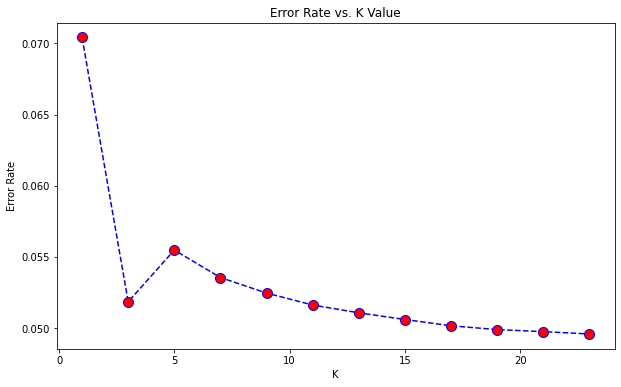

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25,2),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:

knn=KNeighborsClassifier(n_neighbors=10,algorithm='auto',weights="uniform")
knn.fit(X_train_scale,y_train)
pred_i = knn.predict(X_test_scale)
print("=====KNN prediction using TD-IDF vectorization====")
print("Accuracy : ",accuracy_score(y_test,pred_i))
print("F1_score : \n",f1_score(y_test,pred_i,average='macro'))

=====KNN prediction using TD-IDF vectorization====
Accuracy :  0.10582400643388513
F1_score : 
 0.15440935551987559


#### 3.2 Train and tune with hyperparamater tuning

In [ ]:
#With hyperparameter tuning

In [46]:
#param grid 
param_grid_lr = {'estimator__C':list(range(1,3)),
                'estimator__penalty': ['l1'],
                 'estimator__solver':  ['liblinear','saga'],
                 
                }
param_grid_nb = {'estimator__alpha': list(range(1,10))}

param_grid_knn = {'estimator__n_neighbors': list(range(1,20)),
             'estimator__algorithm': ['auto', 'brute'],
             'estimator__weights':['uniform','distance']}



param_grid_decisionCl = {'estimator__criterion':['gini','entropy'],
                         'estimator__splitter':['best','random'],
                         'estimator__max_depth':list(range(2,10)),
                         'estimator__max_leaf_nodes':list(range(2,10))
                        }

param_grid_rf ={'estimator__n_estimators':list(range(1,100)),'estimator__criterion':['gini','entropy'],'estimator__max_depth':list(range(1,100))}



In [66]:
rs_lr=  RandomizedSearchCV(OneVsRestClassifier(LogisticRegression(max_iter=1)),param_grid_lr,n_iter=1,cv=2)
rs_knn =RandomizedSearchCV(OneVsRestClassifier(KNeighborsClassifier()),param_grid_knn,n_iter=5,cv=5)
rs_nb= RandomizedSearchCV(OneVsRestClassifier(multiNomialNB),param_grid_nb,n_iter=10,cv=5)
rs_dcl = RandomizedSearchCV(OneVsRestClassifier(decisionCl),param_grid_decisionCl,n_iter=5,cv=5,verbose=2)
rs_rf = RandomizedSearchCV(OneVsRestClassifier(randomForest),param_grid_rf,n_iter=5,cv=5,verbose=2)

In [54]:
grids = [rs_rf]
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0:'DecisionTreeClassifier',1:'RandomForest',2:'Naive Bayes',3:'Logistic Regression'}


In [ ]:
#Preditct using TF-IDF as vectorization method

In [67]:
print("\n=============Prediction using TF-IDF as vectorization method for logistic Regression========")

rs_lr.fit(X_train_scale, y_train)
# Best params
print('Best params: %s' % rs_lr.best_params_)
# Predict on test data with best params
y_pred = rs_lr.predict(X_test_scale)
# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))
print("F1 score :\n",f1_score(y_test,y_pred,average='weighted'))


=============Prediction using TF-IDF as vectorization method for logistic Regression========


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

Best params: {'estimator__solver': 'saga', 'estimator__penalty': 'l1', 'estimator__C': 2}
Test set accuracy score for best params: 0.154 
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.18      0.30       218
           1       0.81      0.17      0.29       646
           2       0.73      0.23      0.35      1041
           3       0.85      0.21      0.34      1219
           4       0.80      0.28      0.41      2062
           5       0.76      0.20      0.31      1650
           6       0.75      0.28      0.41      1693
           7       0.75      0.07      0.13       864
           8       0.88      0.10      0.18       805
           9       0.77      0.19      0.30      1196
          10       0.57      0.12      0.20       514
          11       0.95      0.59      0.72       563
          12       0.60      0.34      0.43      1031
          13       0.93      0.44      0.60       620
          14       0.83    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
print("\n=============Prediction using TF-IDF vectorization method for RandomForest========")
scores_rf= cross_val_score(randomForest, X_train_scale, y_train,  cv=5,verbose=1)


=============Prediction using TF-IDF vectorization method for RandomForest========


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min finished


In [62]:
print(np.mean(scores_rf))

0.030303030303030304


In [59]:
print("\n=============Prediction using TF-IDF as vectorization method for Naive Bayes========")

rs_nb.fit(X_train_scale, y_train)
# Best params
print('Best params: %s' % rs_nb.best_params_)
# Predict on test data with best params
y_pred = rs_nb.predict(X_test_scale)
# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))
print("F1 score :\n",f1_score(y_test,y_pred,average='weighted'))


=============Prediction using TF-IDF as vectorization method for Naive Bayes========


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best params: {'estimator__alpha': 1}
Test set accuracy score for best params: 0.107 
Classification report:
               precision    recall  f1-score   support

           0       0.39      0.06      0.10       218
           1       0.58      0.11      0.18       646
           2       0.73      0.15      0.25      1041
           3       0.81      0.17      0.29      1219
           4       0.91      0.22      0.36      2062
           5       0.83      0.13      0.22      1650
           6       0.86      0.15      0.25      1693
           7       0.66      0.04      0.07       864
           8       0.70      0.06      0.12       805
           9       0.96      0.09      0.17      1196
          10       0.27      0.01      0.03       514
          11       0.85      0.41      0.56       563
          12       0.70      0.16      0.27      1031
          13       0.91      0.32      0.47       620
          14       0.00      0.00      0.00        93
          15       0.00   

In [59]:
print("\n=============Prediction using Bag of words as vectorization method for TandomForest========")
scores_rf= cross_val_score(randomForest, X_train_bow_scale, y_train_bow,  cv=5,verbose=1)


=============Prediction using Bag of words as vectorization method for TandomForest========


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.5min finished


In [60]:
print(np.mean(scores_rf))

0.02208818038201924


In [61]:
print("\n=============Prediction using Bag of words as vectorization method for logistic Regression========")

rs_lr.fit(X_train_bow_scale, y_train_bow)
# Best params
print('Best params: %s' % rs_lr.best_params_)
# Predict on test data with best params
y_pred = rs_lr.predict(X_test_bow_scale)
# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test_bow, y_pred))
print('Classification report:\n',classification_report(y_test_bow,y_pred))
print("F1 score :\n",f1_score(y_test_bow,y_pred,average='weighted'))


=============Prediction using Bag of words as vectorization method for logistic Regression========


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best params: {'estimator__solver': 'liblinear', 'estimator__penalty': 'l1', 'estimator__C': 2}
Test set accuracy score for best params: 0.058 
Classification report:
               precision    recall  f1-score   support

           0       0.07      0.17      0.10       218
           1       0.19      0.18      0.19       646
           2       0.28      0.23      0.25      1041
           3       0.36      0.23      0.28      1219
           4       0.47      0.31      0.37      2062
           5       0.61      0.18      0.28      1650
           6       0.44      0.30      0.36      1693
           7       0.11      0.09      0.10       864
           8       0.13      0.11      0.12       805
           9       0.27      0.19      0.23      1196
          10       0.07      0.08      0.07       514
          11       0.35      0.51      0.42       563
          12       0.35      0.29      0.32      1031
          13       0.35      0.35      0.35       620
          14       0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score :
 0.39691814921022145


In [62]:
print("\n=============Prediction using Bag of words as vectorization method for Naive Bayes========")

rs_nb.fit(X_train_bow_scale, y_train_bow)
# Best params
print('Best params: %s' % rs_nb.best_params_)
# Predict on test data with best params
y_pred = rs_nb.predict(X_test_bow_scale)
# Test data accuracy of model with best params
print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test_bow, y_pred))
print('Classification report:\n',classification_report(y_test_bow,y_pred))
print("F1 score :\n",f1_score(y_test_bow,y_pred,average='weighted'))


=============Prediction using Bag of words as vectorization method for Naive Bayes========


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best params: {'estimator__alpha': 1}
Test set accuracy score for best params: 0.031 
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       218
           1       0.85      0.02      0.03       646
           2       0.87      0.04      0.08      1041
           3       0.92      0.06      0.11      1219
           4       0.90      0.03      0.06      2062
           5       0.70      0.04      0.07      1650
           6       0.90      0.07      0.12      1693
           7       0.00      0.00      0.00       864
           8       0.73      0.02      0.04       805
           9       0.00      0.00      0.00      1196
          10       0.00      0.00      0.00       514
          11       0.87      0.29      0.43       563
          12       0.53      0.02      0.03      1031
          13       0.96      0.04      0.07       620
          14       0.00      0.00      0.00        93
          15       0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Train and tune a neural network

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

embedding_dim = 2000
max_len = 200


tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(features)
sequences = tokenizer.texts_to_sequences(features)
X_feat_seq = pad_sequences(sequences, truncating='post', maxlen=max_len)
vocab_size = len(tokenizer.word_index) + 1

In [48]:
embeddings_index = dict()

f = open('/content/drive/MyDrive/Great Learning/NLP/glove.6B.50d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
# create a weight matrix for words in training docs

# define model

Loaded 400001 word vectors.


In [49]:
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [50]:
X_trainNN,X_testNN,y_trainNN,y_testNN=train_test_split(X_feat_seq,category,random_state=42,test_size=0.30)

In [52]:
def train_test_model(Lambda,lr,epoch):
  modelNN=Sequential()
  modelNN.add(Input(shape=(max_len) ))

  modelNN.add(Embedding(vocab_size,50,weights=[embedding_matrix],input_length=max_len))
  modelNN.add(Flatten())
  #modelNN.add(Dense(512,activation='relu',kernel_initializer=GlorotNormal()))
  modelNN.add(BatchNormalization())
  modelNN.add(Dropout(0.2))
  #modelNN.add(Dense(256,activation='relu',kernel_initializer=GlorotNormal()))
  #m#odelNN.add(BatchNormalization())
  #modelNN.add(Dropout(0.2))
  #modelNN.add(Dense(256,activation='relu',kernel_initializer=GlorotNormal()))
  #modelNN.add(BatchNormalization())
  #modelNN.add(Dropout(0.2))
  #modelNN.add(Dense(128,activation='relu',kernel_initializer=GlorotNormal()))
  #modelNN.add(BatchNormalization())
  #modelNN.add(Dropout(0.2))
  modelNN.add(Dense(80,activation='sigmoid',kernel_initializer=GlorotNormal()))
  sgd=tensorflow.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
  modelNN.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
  history = modelNN.fit(X_trainNN, y_trainNN, batch_size=100, epochs=epoch, verbose=1,validation_split=0.2)
  acc=modelNN.evaluate(X_testNN,y_testNN)
  return acc,modelNN

In [59]:
import math
for i in range (1,6):
    lr = math.pow(10, np.random.uniform(-4.0, 0))
    Lambda = math.pow(10, np.random.uniform(-5,-3))
    acc,model_sgd = train_test_model( Lambda,lr, 20)
    print("try {0}/{1} Best_val_acc: {2}, lr: {3}, Lambda: {4}\n ".format(i,5 ,acc, lr, Lambda))

Epoch 1/20
279/279 [==============================] - 16s 56ms/step - loss: 0.2457 - accuracy: 0.0090 - val_loss: 0.1628 - val_accuracy: 0.0034
Epoch 2/20
279/279 [==============================] - 14s 50ms/step - loss: 0.1396 - accuracy: 0.0293 - val_loss: 0.1770 - val_accuracy: 0.0078
Epoch 3/20
279/279 [==============================] - 14s 51ms/step - loss: 0.1249 - accuracy: 0.0419 - val_loss: 0.1838 - val_accuracy: 0.0090
Epoch 4/20
279/279 [==============================] - 14s 50ms/step - loss: 0.1179 - accuracy: 0.0499 - val_loss: 0.1887 - val_accuracy: 0.0106
Epoch 5/20
279/279 [==============================] - 15s 52ms/step - loss: 0.1135 - accuracy: 0.0576 - val_loss: 0.1916 - val_accuracy: 0.0118
Epoch 6/20
279/279 [==============================] - 14s 50ms/step - loss: 0.1106 - accuracy: 0.0620 - val_loss: 0.1968 - val_accuracy: 0.0119
Epoch 7/20
279/279 [==============================] - 15s 53ms/step - loss: 0.1086 - accuracy: 0.0675 - val_loss: 0.1993 - val_accuracy:

In [ ]:
model_sgd.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 50)           6296800   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 10000)             40000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 80)                800080    
Total params: 7,136,880
Trainable params: 7,116,880
Non-trainable params: 20,000
_________________________________________________________________


In [ ]:
model_sgd.evaluate(X_test,y_test)

467/467 [==============================] - 1s 3ms/step - loss: 0.1586 - accuracy: 0.0074


[0.15855392813682556, 0.007372159976512194]

### 4. Display and explain in detail the classification report

##### Comparing all the accuracies and F1 score, TF-IDF vectorization along with logistic regression model provides us the best score, so we will use the model to predict authors' features.

In [73]:
#logModel=OneVsRestClassifier(logRegression)
#logModel.fit(X_train_scale,y_train)
log_predict = rs_lr.predict(X_test_scale)

In [74]:
y_test_inv = binarizer.inverse_transform(y_test)
log_predict_inv= binarizer.inverse_transform(log_predict)

In [75]:
print("Accuracy : ",accuracy_score(y_test,log_predict))
print('Classification report:\n',classification_report(y_test,log_predict))

Accuracy :  0.1538100663494404
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.18      0.30       218
           1       0.81      0.17      0.29       646
           2       0.73      0.23      0.35      1041
           3       0.85      0.21      0.34      1219
           4       0.80      0.28      0.41      2062
           5       0.76      0.20      0.31      1650
           6       0.75      0.28      0.41      1693
           7       0.75      0.07      0.13       864
           8       0.88      0.10      0.18       805
           9       0.77      0.19      0.30      1196
          10       0.57      0.12      0.20       514
          11       0.95      0.59      0.72       563
          12       0.60      0.34      0.43      1031
          13       0.93      0.44      0.60       620
          14       0.83      0.05      0.10        93
          15       0.67      0.07      0.12        60
          16       0.83   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### From the above classification report, we observe that F1 score is around 44%. The accuracy is not much since the classes are not even distributed but as per classification report, for almost all classes, prediction is done which means F1 score takes each class into account rather than accuracy as a whole.There are 80 classes including all ranges of ages, zodiac sign, topic and gender.

### 5. Print the true vs predicted labels for any 5 entries from the dataset

In [72]:
for i in range(100,111):
  print("\nIndex :",i)
  print("Acutal Label : ",y_test_inv[i])
  print("Predicted Label :",log_predict_inv[i])


Index : 100
Acutal Label :  ('23', 'Pisces', 'Student', 'female')
Predicted Label : ('23', 'Pisces', 'Student', 'female')

Index : 101
Acutal Label :  ('16', 'Taurus', 'female', 'indUnk')
Predicted Label : ('16', 'male')

Index : 102
Acutal Label :  ('23', 'Scorpio', 'Student', 'female')
Predicted Label : ('female', 'male')

Index : 103
Acutal Label :  ('14', 'Museums-Libraries', 'Scorpio', 'male')
Predicted Label : ('14', 'Museums-Libraries', 'Scorpio', 'male')

Index : 104
Acutal Label :  ('36', 'Advertising', 'Cancer', 'female')
Predicted Label : ()

Index : 105
Acutal Label :  ('35', 'Aries', 'Technology', 'male')
Predicted Label : ('female',)

Index : 106
Acutal Label :  ('15', 'Gemini', 'Student', 'male')
Predicted Label : ('male',)

Index : 107
Acutal Label :  ('34', 'Aquarius', 'Education', 'male')
Predicted Label : ('34', 'Aquarius', 'Education', 'male')

Index : 108
Acutal Label :  ('35', 'Cancer', 'Technology', 'male')
Predicted Label : ('female',)

Index : 109
Acutal Label

##### From above predicted values we see that out of 3/10 predictions are correct( indices 100,103,107), 5 /10 are partially predicted (indices 101, 102, 110, 106,109) and 2/10 were not predicted.

### Conclusion/Observation:

1. Bag of words


| Model/metrics|Accuracy|F1 Score |
|:---:|:-------------:|:-----------:|
| Logistic Regression|0.12|0.19|
| K-Nearest Neighbour|0.028|0.05|
| Naive Bayes|0.035|0.05|
| Random Forest classifier | 0.037|0.054|
|Decision Tree |0.067|0.22|
 
With Hyperparameter tuning

| Model/metrics|Accuracy|F1 Score |
|:---:|:-------------:|:-----------:|
| Logistic Regression|0.05|0.396|
| Naive Bayes|0.031|0.245|
|Random Forest classifier | 0.049|0.267|





2. TF-IDF 


| Model/metrics|Accuracy|F1 Score |
|:---:|:-------------:|:-----------:|
| Logistic Regression|0.17|0.28|
| K-Nearest Neighbour| 0.024|0.040|
| Naive Bayes|0.107|0.14|
| Random Forest classifier |0.049|0.114|
|Decision Tree |0.066| 0.257|


With Hyperparameter tuning

 | Model/metrics|Accuracy|F1 Score |
|:---:|:-------------:|:-----------:|
| Logistic Regression|0.15|0.44|
| Naive Bayes|0.107|0.37|
| Random Forest classifier |0.03|0.26|



3. From the above task , we were able to predict authors' features from blog text using multi-label classification.We were able to preprocess , vectorize and use the text data as indepedent feature for machine learning algorithm. The multi-labels were transformed to single multi-class targets and binarized. Since the target is in logical format , logistic regression is able to perform the best.
